In [59]:
from os import path

import numpy as np
import matplotlib.pyplot as plt

import rasterio

In [122]:
data = {
    "Rwanda": {
        "population": {
            "fp": ("./data/population/"
                   "Rwanda_population_data_2020_UNadj_constrained.tif"),
            "raster_channels": [1]
        },
        "osm_img": {
            "fp": "./data/osm/imgs/rwanda_osm_nolab_1-50000_4326.tiff",
            "raster_channels": [1, 2, 3]
        },
        "elevation": {
            "fp": "./data/slope_elevation/elevation_rwanda.tif",
            "raster_channels": [2]
        },
        "slope": {
            "fp": "./data/slope_elevation/slope_rwanda.tif",
            "raster_channels": [2]
        },
        "roads": {
            "fp": "./data/osm/roads/rwanda-osm-roads.tif",
            "raster_channels": [1]
        },
        "waterways": {
            "fp": "./data/osm/waterways/rwanda-osm-waterways.tif",
            "raster_channels": [1]
        },
        "admin_bounds_qgis": {
            "fp": ("./data/admin_boundaries/"
                   "Rwanda_Village_AdminBoundary_1_3600.tiff"),
            "raster_channels": [1]
        },
        "admin_bounds_gadm": {
            "fp": "./data/admin_boundaries/GADM_rwanda.tif",
            "raster_channels": [1]
        },
        "country_bounds": {
            "fp": "./data/country_masks/rwanda.shp",
            "raster_channels": [1]
        },
        "mask": {
            "fp": "./data/country_masks/rwanda_mask_1-3600.tiff",
            "raster_channels": [1]
        }
    },
    "Uganda": {
        "population": {
            "fp": ("./data/population/"
                   "Uganda_population_data_2020_UNadj_constrained.tif"),
            "raster_channels": [1]
        },
        "osm_img": {
            "fp": "./data/osm/imgs/uganda_osm_nolab_1-50000_4326.tiff",
            "raster_channels": [1, 2, 3]
        },
        "elevation": {
            "fp": "./data/slope_elevation/elevation_uganda.tif",
            "raster_channels": [2]
        },
        "slope": {
            "fp": "./data/slope_elevation/slope_uganda.tif",
            "raster_channels": [2]
        },
        "roads": {
            "fp": "./data/osm/roads/uganda-osm-roads.tif",
            "raster_channels": [1]
        },
        "waterways": {
            "fp": "./data/osm/waterways/uganda-osm-waterways.tif",
            "raster_channels": [1]
        },
        "admin_bounds_qgis": {
            "fp": ("./data/admin_boundaries/"
                   "Uganda_Parish_AdminBoundary_1_3600.tiff"),
            "raster_channels": [1]
        },
        "admin_bounds_gadm": {
            "fp": "./data/admin_boundaries/GADM_uganda.tif",
            "raster_channels": [1]
        },
        "country_bounds": {
            "fp": "./data/country_masks/uganda.shp",
            "raster_channels": [1]
        },
        "mask": {
            "fp": "./data/country_masks/uganda_mask_1-3600.tiff",
            "raster_channels": [1]
        }
    },
}

In [ ]:
meta

In [ ]:
# Rwanda merge
country = "Uganda"
first_k = "population"
sorted_keys = sorted(list(data[country].keys()))
rw_os_img_fp = path.join("..", data[country][first_k]["fp"])
with rasterio.open(rw_os_img_fp) as rw_osm_img:
    meta = rw_osm_img.meta
    meta.update(count=sum(
        [len(data[country][k]["raster_channels"]) for k in sorted_keys
         if k != "admin_bounds_gadm" and k != "country_bounds"]))
    meta.update()

!rm ./test_merge.tiff
merge_output = path.join('./test_merge.tiff')

with rasterio.open(merge_output, 'w', **meta) as dst:
    with rasterio.open(rw_os_img_fp) as rw_osm_img:
        print("Writing {}".format(first_k))
        for i in data[country][first_k]["raster_channels"]:
            d = rw_osm_img.read(i)
            print(d.min(), d.max())
            dst.write_band(i, d)
    current_band = len(data[country][first_k]["raster_channels"]) + 1
    for k in sorted_keys:
        if k == first_k or k == "admin_bounds_gadm" or k == "country_bounds":
            continue
        print("Writing {}".format(k))
        for c in data[country][k]["raster_channels"]:
            with rasterio.open(path.join("..", data[country][k]["fp"])) as src:
                d = src.read(c)
                print(d.min(), d.max())
                dst.write_band(current_band, d)
            current_band += 1    

Writing population
-99999.0 4255.179
Writing admin_bounds_qgis
0.0 1.0
Writing elevation
0 239
Writing mask
0.0 1.0
Writing osm_img
0 255
0 255
0 255
Writing roads
0.0 8.0


In [ ]:
with rasterio.open(merge_output) as rw_merged:
    for i in range(meta["count"]):
        d = rw_merged.read(i + 1)
        print(d.min(), d.max())

Min, max:  -99999.0 299.39877


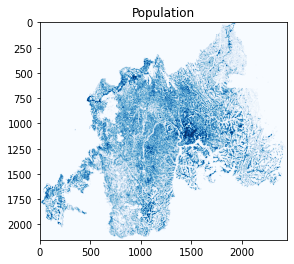

In [106]:
with rasterio.open(merge_output) as rw_merged:
    popu = rw_merged.read(1)
    plt.imshow(np.expand_dims(popu, -1), cmap="Blues")
    plt.title("Population")
    print("Min, max: ", np.min(popu), np.max(popu))

Min, max:  0.0 1.0


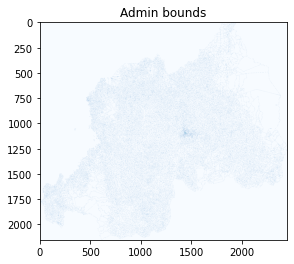

In [109]:
with rasterio.open(merge_output) as rw_merged:
    ab = rw_merged.read(2)
    plt.imshow(np.expand_dims(ab, -1), cmap="Blues")
    plt.title("Admin bounds")
    print("Min, max: ", np.min(ab), np.max(ab))

Min, max:  0.0 229.0


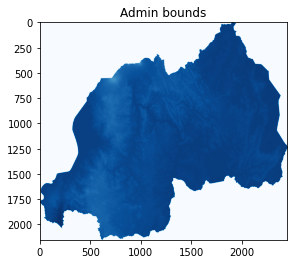

In [112]:
with rasterio.open(merge_output) as rw_merged:
    ele = rw_merged.read(3)
    plt.imshow(np.expand_dims(ele, -1), cmap="Blues")
    plt.title("Elevation")
    print("Min, max: ", np.min(ele), np.max(ele))

Min, max:  0.0 1.0


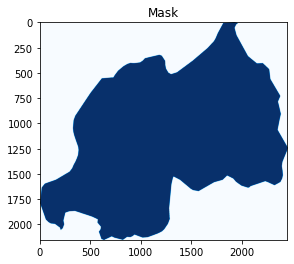

In [113]:
with rasterio.open(merge_output) as rw_merged:
    ma = rw_merged.read(4)
    plt.imshow(np.expand_dims(ma, -1), cmap="Blues")
    plt.title("Mask")
    print("Min, max: ", np.min(ma), np.max(ma))

Min, max:  0.0 255.0


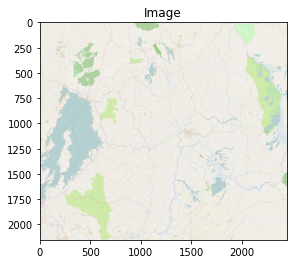

In [117]:
with rasterio.open(merge_output) as rw_merged:
    img = np.concatenate((
        np.expand_dims(rw_merged.read(5), -1),
        np.expand_dims(rw_merged.read(6), -1),
        np.expand_dims(rw_merged.read(7), -1)), -1
    )
    plt.imshow(img.astype(np.uint), cmap="Blues")
    plt.title("Image")
    print("Min, max: ", np.min(img), np.max(img))

Min, max:  0.0 8.0


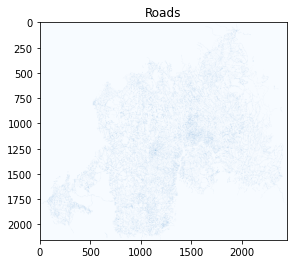

In [119]:
with rasterio.open(merge_output) as rw_merged:
    ro = rw_merged.read(8)
    plt.imshow(np.expand_dims(ro, -1), cmap="Blues")
    plt.title("Roads")
    print("Min, max: ", np.min(ro), np.max(ro))

Min, max:  0.0 255.0


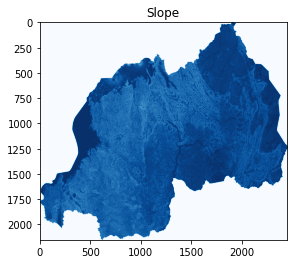

In [118]:
with rasterio.open(merge_output) as rw_merged:
    slo = rw_merged.read(9)
    plt.imshow(np.expand_dims(slo, -1), cmap="Blues")
    plt.title("Slope")
    print("Min, max: ", np.min(slo), np.max(slo))

Min, max:  0.0 3.0


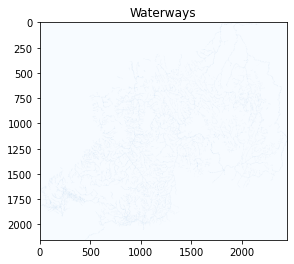

In [120]:
with rasterio.open(merge_output) as rw_merged:
    wa = rw_merged.read(10)
    plt.imshow(np.expand_dims(wa, -1), cmap="Blues")
    plt.title("Waterways")
    print("Min, max: ", np.min(wa), np.max(wa))